In [1]:
# Imports

import pandas as pd
from numpy import mean
from numpy import std
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import math
import obspy

from obspy.core import read
from obspy.core import Trace
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import z_detect
from obspy.signal.trigger import pk_baer
from obspy.signal.trigger import classic_sta_lta

In [2]:
def signal_picker(filename):
    file = pd.read_csv(r'../Renamed_Records/' + filename, low_memory=False)
    df = file.copy()
    df.set_axis(["time", "acceleration"],axis=1,inplace=True)
    
    acceleration_array = np.float32(df['acceleration'].to_numpy())
    count_steps = len(df.index)
    total_time = df.time.iloc[-1]
    
    sample_rate = float(count_steps)/float(total_time)
    
    #print(acceleration_array)

    #print(count_steps)
    #print(total_time)
    #print(sample_rate)
    #print(acceleration_array.dtype)
    
    p_pick, phase_info = pk_baer(acceleration_array, int(sample_rate), 20, 60, 7.0, 12.0, 100, 100) #ver documentação
    # 60 numero mínimo de samples para poder ser aceite como o pick
    # 7.0  transhold para ativar pico
    # 12.0 transhold para atualizar o sigma
    # 100 numero de pontos para ser utilizados para estimar a variação
    # 100 define o intervalo de tempo pela qualk a amplitude max é avaliada
    # 1º valor do dataset é ignorado
    
    return p_pick, phase_info, p_pick/int(sample_rate)


def signal_trigger(filename):
    file = pd.read_csv(r'../Renamed_Records/' + filename, low_memory=False)
    df = file.copy()
    df.set_axis(["time", "acceleration"],axis=1,inplace=True)
    
    acceleration_array = np.float32(df['acceleration'].to_numpy())
    count_steps = len(df.index)
    total_time = df.time.iloc[-1]
    
    sample_rate = float(count_steps)/float(total_time)
    cft = classic_sta_lta(acceleration_array, int(2*sample_rate),int(5*sample_rate))
    # para análise vai pegar nos dados e cria uma janela, a janela tem tamanho mínimo (5s) e máx(10s)
    #
    
    plot_trigger(Trace(acceleration_array), cft, 1.5, 0.5)
    print(signal_picker(filename))
    
def signal_trigger_z_detect(filename):
    file = pd.read_csv(r'../Renamed_Records/' + filename, low_memory=False)
    df = file.copy()
    df.set_axis(["time", "acceleration"],axis=1,inplace=True)
    
    acceleration_array = np.float32(df['acceleration'].to_numpy())
    count_steps = len(df.index)
    total_time = df.time.iloc[-1]
    
    sample_rate = float(count_steps)/float(total_time)
    cft = z_detect(acceleration_array, int(0.5*sample_rate))
    # para análise vai pegar nos dados e cria uma janela, a janela tem tamanho mínimo (5s) e máx(10s)
    #
    
    plot_trigger(Trace(acceleration_array), cft, 1.5, 0.5)
    print(signal_picker(filename))

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_5880\4240995760.py:33: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(["time", "acceleration"],axis=1,inplace=True)


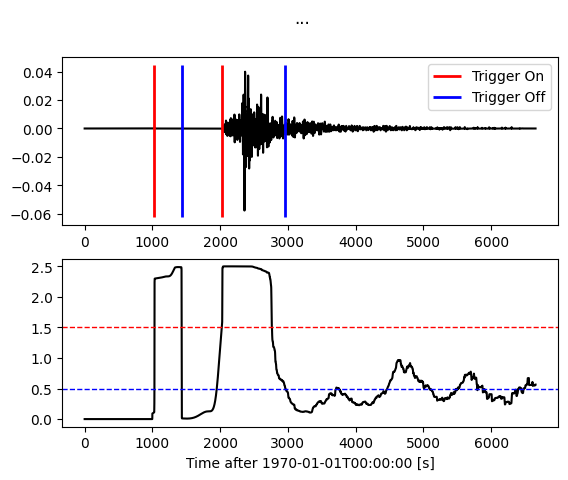

(1930, 'EPD4', 9.65)


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_5880\4240995760.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(["time", "acceleration"],axis=1,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_5880\4240995760.py:50: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(["time", "acceleration"],axis=1,inplace=True)


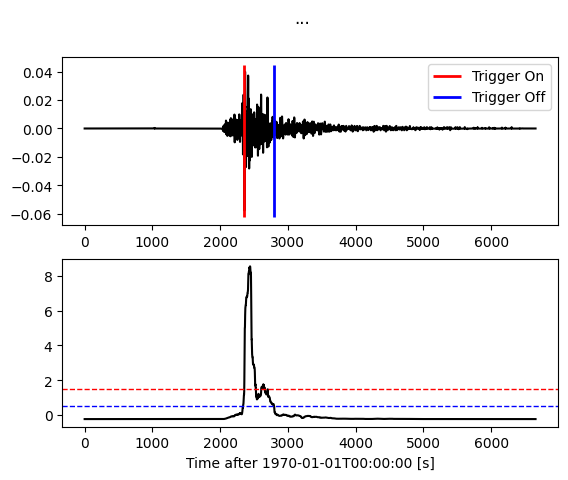

(1930, 'EPD4', 9.65)


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_5880\4240995760.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(["time", "acceleration"],axis=1,inplace=True)


In [3]:

#signal_trigger('SI.CEY.HNE.SI-1995-0008.csv')
signal_trigger('ES.SAGR.HNE.ES-1997-0009.csv')

#signal_trigger_z_detect('SI.CEY.HNE.SI-1995-0008.csv')
signal_trigger_z_detect('ES.SAGR.HNE.ES-1997-0009.csv')

#signal_trigger('HI.KYP1.HN2.EMSC-19981006_0000006.csv')
#signal_trigger('HI.PYR1.HN2.GR-1993-0011.csv')

#signal_trigger('A.GUK.HNE.AM-1988-0001.csv')
#signal_trigger('A.GZL.HNE.UZ-1976-0001.csv')